In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Training data shape: (8000, 7)

--- Data Info (Checking for types and missing values) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    8000 non-null   int64 
 1   Therapy Hours         8000 non-null   int64 
 2   Initial Health Score  8000 non-null   int64 
 3   Lifestyle Activities  8000 non-null   object
 4   Average Sleep Hours   8000 non-null   int64 
 5   Follow-Up Sessions    8000 non-null   int64 
 6   Recovery Index        8000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 437.6+ KB
None

--- Statistical Summary (Checking for ranges and outliers) ---
                 Id  Therapy Hours  Initial Health Score  Average Sleep Hours  \
count   8000.000000    8000.000000           8000.000000          8000.000000   
mean    5012.506875       4.983250             69.531000             6.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


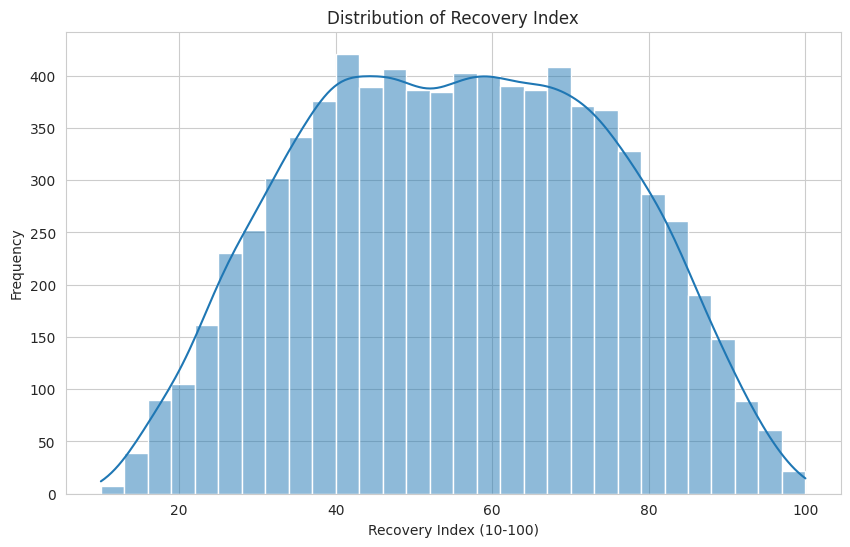

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for the plots
sns.set_style('whitegrid')

# --- Load the Data ---
# Make sure your CSV files are in the same directory, or provide the full path
try:
    train_df = pd.read_csv('/kaggle/input/Patient-Recovery-Prediction-Challenge/train.csv') # Assuming the training file is train.csv
    test_df = pd.read_csv('/kaggle/input/Patient-Recovery-Prediction-Challenge/test.csv')   # Assuming the test file is test.csv
    
    # Let's also look at the 'id' or 'patient_id' column if it exists
    # If your dataset has an ID column, replace 'id' with the actual column name
    # if 'id' in train_df.columns:
    #     print(f"Training data has {train_df.shape[0]} rows and {train_df.shape[1]} columns.")
    #     print(f"Test data has {test_df.shape[0]} rows and {test_df.shape[1]} columns.")
    # else:
    #     print("Please replace 'id' with your dataset's ID column name for a full check.")
    
    print(f"Training data shape: {train_df.shape}")
    
except FileNotFoundError:
    print("Error: train.csv or test.csv not found.")
    print("Please make sure the files are in the correct directory.")
    # Exit or stop execution if files aren't loaded
    # In a notebook, you'd just see this error.
    
# --- 1. Initial Inspection (Info & Missing Values) ---
print("\n--- Data Info (Checking for types and missing values) ---")
print(train_df.info())

# --- 2. Statistical Summary ---
print("\n--- Statistical Summary (Checking for ranges and outliers) ---")
print(train_df.describe())

# --- 3. Categorical Feature Check ---
print("\n--- Categorical Feature ('Lifestyle Activities') Counts ---")
print(train_df['Lifestyle Activities'].value_counts())

# --- 4. Target Variable Analysis ---
print("\n--- Plotting Target Variable (Recovery Index) ---")
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Recovery Index'], kde=True, bins=30)
plt.title('Distribution of Recovery Index')
plt.xlabel('Recovery Index (10-100)')
plt.ylabel('Frequency')
plt.show()

--- Processed Data Head ---
   Therapy Hours  Initial Health Score  Lifestyle Activities  \
0              5                    49                     0   
1              2                    48                     1   
2              2                    81                     0   
3              2                    46                     0   
4              8                    47                     0   

   Average Sleep Hours  Follow-Up Sessions  Recovery Index  
0                    7                   5              36  
1                    7                   6              25  
2                    7                   2              59  
3                    6                   1              22  
4                    9                   0              40  

--- Plotting Correlation Heatmap ---


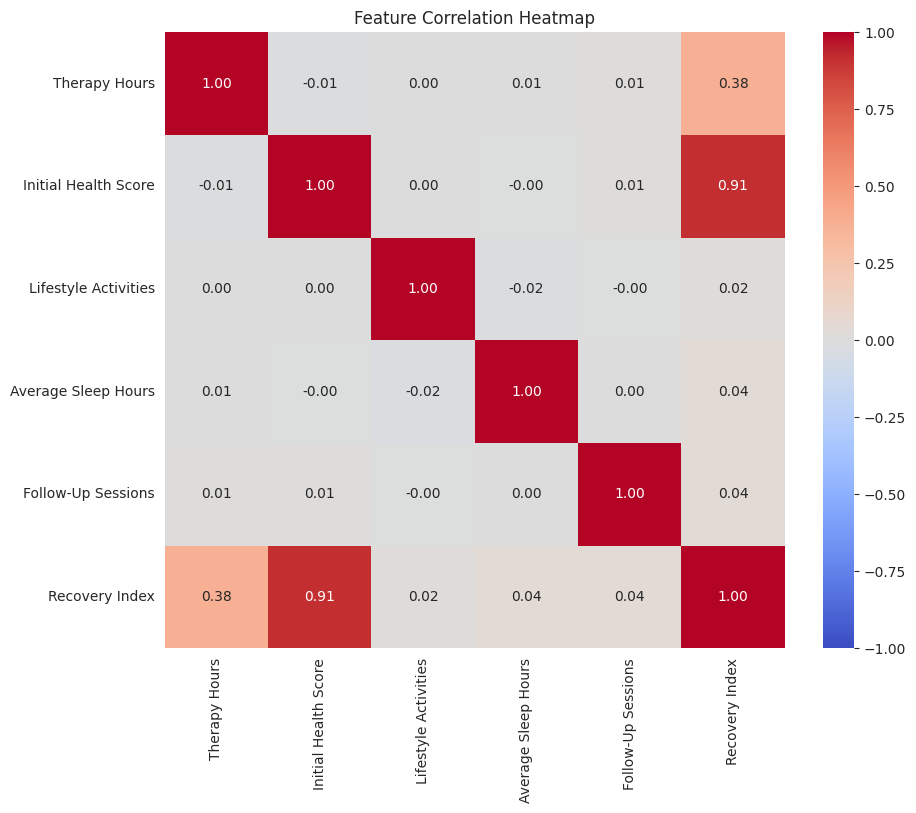


--- Plotting Feature vs. Target ---


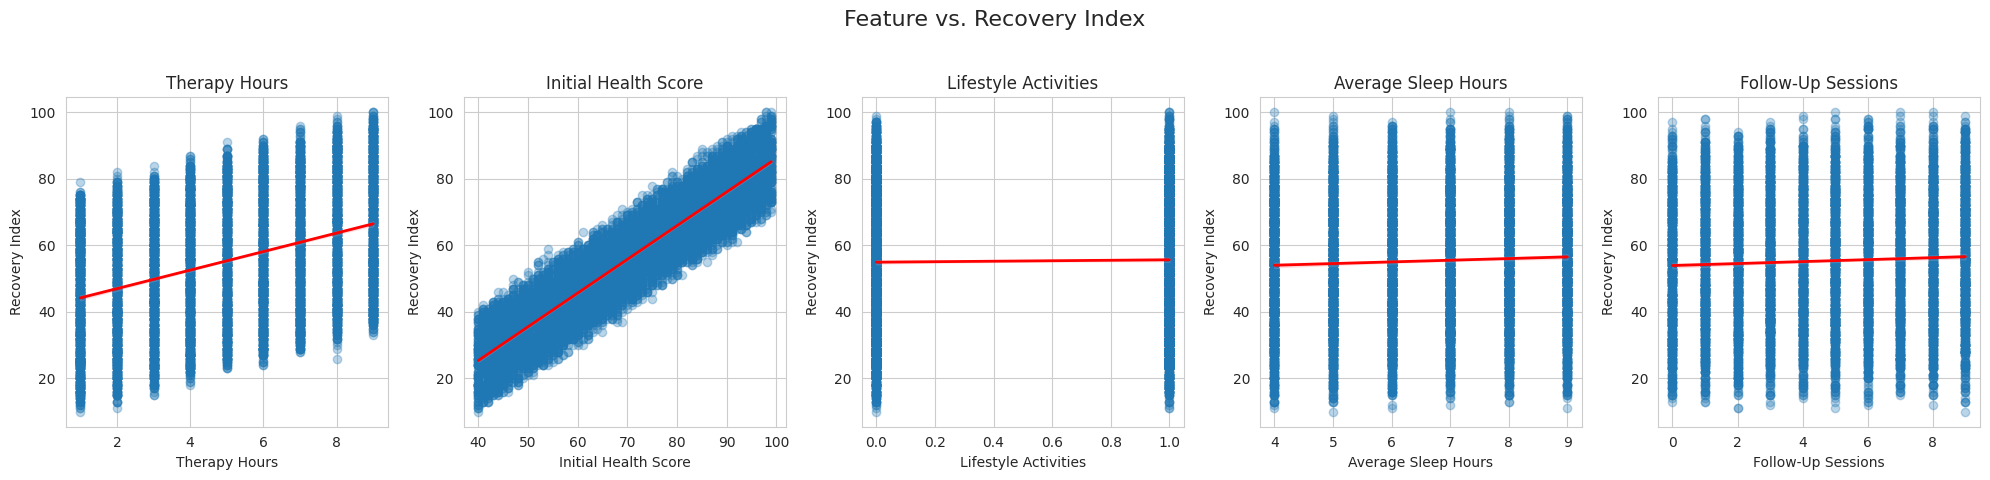

In [3]:
# --- 1. Preprocessing ---

# Drop the 'Id' column as it's not a feature
try:
    train_df_processed = train_df.drop('Id', axis=1)
    
    # Also drop from the test set (it will have an 'Id' column too)
    # We must apply all the same steps to the test set
    test_df_processed = test_df.drop('Id', axis=1) 
    
except KeyError:
    print("Warning: 'Id' column not found. It might have been dropped already.")
    train_df_processed = train_df.copy() # Use the original df
    test_df_processed = test_df.copy()

# Encode 'Lifestyle Activities' (Yes=1, No=0)
train_df_processed['Lifestyle Activities'] = train_df_processed['Lifestyle Activities'].map({'Yes': 1, 'No': 0})
test_df_processed['Lifestyle Activities'] = test_df_processed['Lifestyle Activities'].map({'Yes': 1, 'No': 0})

print("--- Processed Data Head ---")
print(train_df_processed.head())

# --- 2. Correlation Analysis ---

print("\n--- Plotting Correlation Heatmap ---")
plt.figure(figsize=(10, 8))
# Calculate the correlation matrix
corr_matrix = train_df_processed.corr()
# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()


# --- 3. Feature vs. Target Scatter Plots ---

print("\n--- Plotting Feature vs. Target ---")
# Get all feature names (all columns except the target)
features = train_df_processed.columns.drop('Recovery Index')

# Create a grid of plots
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(20, 5))
fig.suptitle('Feature vs. Recovery Index', fontsize=16)

for i, col in enumerate(features):
    # Use regplot to add a regression line, which helps see the trend
    sns.regplot(ax=axes[i], data=train_df_processed, x=col, y='Recovery Index', 
                line_kws={"color": "red", "lw": 2}, scatter_kws={'alpha':0.3})
    axes[i].set_title(f'{col}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [5]:
import itertools
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# -----------------------------
# SETTINGS
# -----------------------------
TARGET_COL = "Recovery Index"
SUBMISSION_FILENAME = "submission_feinter1.csv"
DROP_MISSING_FRAC = 0.3
OPS = ("product", "sum", "diff", "ratio")  # include ratio safely
MAX_PAIRS = None  # limit for combinatorial explosion

# -----------------------------
# 1) create pairwise features
# -----------------------------
train_df_new = train_df_processed.copy()
test_df_new  = test_df_processed.copy()

numeric_cols = train_df_new.select_dtypes(include=[np.number]).columns.tolist()
if TARGET_COL in numeric_cols:
    numeric_cols.remove(TARGET_COL)

pairs = list(itertools.combinations(numeric_cols, 2))
if MAX_PAIRS is not None:
    pairs = pairs[:MAX_PAIRS]

for a, b in pairs:
    if "product" in OPS:
        train_df_new[f"{a}__x__{b}"] = train_df_new[a]*train_df_new[b]
        test_df_new[f"{a}__x__{b}"]  = test_df_new[a]*test_df_new[b]
    if "sum" in OPS:
        train_df_new[f"{a}__plus__{b}"] = train_df_new[a]+train_df_new[b]
        test_df_new[f"{a}__plus__{b}"]  = test_df_new[a]+test_df_new[b]
    if "diff" in OPS:
        train_df_new[f"{a}__minus__{b}"] = train_df_new[a]-train_df_new[b]
        test_df_new[f"{a}__minus__{b}"]  = test_df_new[a]-test_df_new[b]
    if "ratio" in OPS:
        # safe ratios: avoid division by zero
        train_df_new[f"{a}__div__{b}"] = train_df_new[a]/train_df_new[b].replace(0,np.nan)
        test_df_new[f"{a}__div__{b}"]  = test_df_new[a]/test_df_new[b].replace(0,np.nan)
        train_df_new[f"{b}__div__{a}"] = train_df_new[b]/train_df_new[a].replace(0,np.nan)
        test_df_new[f"{b}__div__{a}"]  = test_df_new[b]/test_df_new[a].replace(0,np.nan)

# -----------------------------
# 2) squares of numeric features
# -----------------------------
for col in numeric_cols:
    train_df_new[f"{col}__squared"] = train_df_new[col]**2
    test_df_new[f"{col}__squared"]  = test_df_new[col]**2

# -----------------------------
# 3) domain-informed interactions
# Example: Therapy Hours * Initial Health Score
# -----------------------------
if "Therapy Hours" in train_df_new.columns and "Initial Health Score" in train_df_new.columns:
    train_df_new["Therapy_Health_Interaction"] = train_df_new["Therapy Hours"] * train_df_new["Initial Health Score"]
    test_df_new["Therapy_Health_Interaction"]  = test_df_new["Therapy Hours"] * test_df_new["Initial Health Score"]

# Another example: Lifestyle Activities * Follow-Up Sessions
if "Lifestyle Activities" in train_df_new.columns and "Follow-Up Sessions" in train_df_new.columns:
    train_df_new["Lifestyle_Followup_Interaction"] = train_df_new["Lifestyle Activities"] * train_df_new["Follow-Up Sessions"]
    test_df_new["Lifestyle_Followup_Interaction"]  = test_df_new["Lifestyle Activities"] * test_df_new["Follow-Up Sessions"]

print("Feature engineering complete. Train shape:", train_df_new.shape)

# -----------------------------
# 4) define X, y and align test columns
# -----------------------------
y = train_df_new[TARGET_COL]
X = train_df_new.drop(TARGET_COL, axis=1)
X_test_final = test_df_new.reindex(columns=X.columns)

# -----------------------------
# 5) drop columns with too many NaNs
# -----------------------------
na_counts = X.isna().sum()
drop_cols = na_counts[na_counts > X.shape[0]*DROP_MISSING_FRAC].index.tolist()
if drop_cols:
    X = X.drop(columns=drop_cols)
    X_test_final = X_test_final.drop(columns=drop_cols, errors='ignore')

# -----------------------------
# 6) impute remaining NaNs (median)
# -----------------------------
imputer = SimpleImputer(strategy='median')
X_imp = imputer.fit_transform(X)
X_test_imp = imputer.transform(X_test_final)

# -----------------------------
# 7) scale for Linear Regression
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imp)
X_test_scaled = scaler.transform(X_test_imp)

# -----------------------------
# 8) train Linear Regression on full data
# -----------------------------
lr = LinearRegression()
lr.fit(X_scaled, y)

# -----------------------------
# 9) predict on test set
# -----------------------------
preds = lr.predict(X_test_scaled)

# -----------------------------
# 10) clip & round predictions to [10,100]
# -----------------------------
preds_final = np.clip(preds, 10, 100)


# -----------------------------
# 11) prepare submission DataFrame using original test IDs
# -----------------------------
submission_df = pd.DataFrame({
    "Id": test_df["Id"].values,       # use original test IDs
    "Recovery Index": preds_final
})

# -----------------------------
# 12) save submission CSV
# -----------------------------
submission_df.to_csv(SUBMISSION_FILENAME, index=False)
print(f"Submission saved to {SUBMISSION_FILENAME}")
submission_df.head()


Feature engineering complete. Train shape: (8000, 63)
Submission saved to submission_feinter1.csv


,Id,Recovery Index
0,6253,54.707225
1,4685,22.442215
2,1732,47.925624
3,4743,31.296595
4,4522,42.909605


In [13]:
import itertools
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# -----------------------------
# SETTINGS
# -----------------------------
TARGET_COL = "Recovery Index"
SUBMISSION_FILENAME = "submission_feinter2.csv"
DROP_MISSING_FRAC = 0.3
OPS = ("product", "sum", "diff", "ratio")
MAX_PAIRS = None  # limit for combinatorial explosion

# -----------------------------
# 1) Create pairwise features
# -----------------------------
train_df_new = train_df_processed.copy()
test_df_new  = test_df_processed.copy()

numeric_cols = train_df_new.select_dtypes(include=[np.number]).columns.tolist()
if TARGET_COL in numeric_cols:
    numeric_cols.remove(TARGET_COL)

pairs = list(itertools.combinations(numeric_cols, 2))
if MAX_PAIRS is not None:
    pairs = pairs[:MAX_PAIRS]

for a, b in pairs:
    if "product" in OPS:
        train_df_new[f"{a}__x__{b}"] = train_df_new[a]*train_df_new[b]
        test_df_new[f"{a}__x__{b}"]  = test_df_new[a]*test_df_new[b]
    if "sum" in OPS:
        train_df_new[f"{a}__plus__{b}"] = train_df_new[a]+train_df_new[b]
        test_df_new[f"{a}__plus__{b}"]  = test_df_new[a]+test_df_new[b]
    if "diff" in OPS:
        train_df_new[f"{a}__minus__{b}"] = train_df_new[a]-train_df_new[b]
        test_df_new[f"{a}__minus__{b}"]  = test_df_new[a]-test_df_new[b]
    if "ratio" in OPS:
        train_df_new[f"{a}__div__{b}"] = train_df_new[a]/train_df_new[b].replace(0,np.nan)
        test_df_new[f"{a}__div__{b}"]  = test_df_new[a]/test_df_new[b].replace(0,np.nan)
        train_df_new[f"{b}__div__{a}"] = train_df_new[b]/train_df_new[a].replace(0,np.nan)
        test_df_new[f"{b}__div__{a}"]  = test_df_new[b]/test_df_new[a].replace(0,np.nan)

# -----------------------------
# 2) Squares, cubes, sqrt, log1p
# -----------------------------
for col in numeric_cols:
    train_df_new[f"{col}_squared"] = train_df_new[col]**2
    test_df_new[f"{col}_squared"]  = test_df_new[col]**2

    train_df_new[f"{col}_cube"] = train_df_new[col]**3
    test_df_new[f"{col}_cube"]  = test_df_new[col]**3

    train_df_new[f"{col}_sqrt"] = np.sqrt(train_df_new[col].clip(lower=0))
    test_df_new[f"{col}_sqrt"]  = np.sqrt(test_df_new[col].clip(lower=0))

    train_df_new[f"{col}_log1p"] = np.log1p(train_df_new[col].clip(lower=0))
    test_df_new[f"{col}_log1p"]  = np.log1p(test_df_new[col].clip(lower=0))

# -----------------------------
# 3) Domain-informed interactions
# -----------------------------
if "Therapy Hours" in train_df_new.columns and "Initial Health Score" in train_df_new.columns:
    train_df_new["Therapy_Health_Interaction"] = train_df_new["Therapy Hours"] * train_df_new["Initial Health Score"]
    test_df_new["Therapy_Health_Interaction"]  = test_df_new["Therapy Hours"] * test_df_new["Initial Health Score"]

if "Lifestyle Activities" in train_df_new.columns and "Follow-Up Sessions" in train_df_new.columns:
    train_df_new["Lifestyle_Followup_Interaction"] = train_df_new["Lifestyle Activities"] * train_df_new["Follow-Up Sessions"]
    test_df_new["Lifestyle_Followup_Interaction"]  = test_df_new["Lifestyle Activities"] * test_df_new["Follow-Up Sessions"]

# -----------------------------
# 4) Ratios / normalized features
# -----------------------------
if "Therapy Hours" in train_df_new.columns and "Follow-Up Sessions" in train_df_new.columns:
    train_df_new["Therapy_per_FollowUp"] = train_df_new["Therapy Hours"]/train_df_new["Follow-Up Sessions"].replace(0,np.nan)
    test_df_new["Therapy_per_FollowUp"]  = test_df_new["Therapy Hours"]/test_df_new["Follow-Up Sessions"].replace(0,np.nan)

if "Lifestyle Activities" in train_df_new.columns and "Age" in train_df_new.columns:
    train_df_new["Lifestyle_per_Age"] = train_df_new["Lifestyle Activities"]/train_df_new["Age"].replace(0,np.nan)
    test_df_new["Lifestyle_per_Age"]  = test_df_new["Lifestyle Activities"]/test_df_new["Age"].replace(0,np.nan)

# -----------------------------
# 5) Deviations from mean
# -----------------------------
for col in ["Initial Health Score", "Therapy Hours"]:
    if col in train_df_new.columns:
        mean_val = train_df_new[col].mean()
        train_df_new[f"{col}_dev"] = train_df_new[col]-mean_val
        test_df_new[f"{col}_dev"]  = test_df_new[col]-mean_val

print("Feature engineering complete. Train shape:", train_df_new.shape)

# -----------------------------
# 6) Define X, y and align test columns
# -----------------------------
y = train_df_new[TARGET_COL]
X = train_df_new.drop(TARGET_COL, axis=1)
X_test_final = test_df_new.reindex(columns=X.columns)

# -----------------------------
# 7) Drop columns with too many NaNs
# -----------------------------
na_counts = X.isna().sum()
drop_cols = na_counts[na_counts > X.shape[0]*DROP_MISSING_FRAC].index.tolist()
if drop_cols:
    X = X.drop(columns=drop_cols)
    X_test_final = X_test_final.drop(columns=drop_cols, errors='ignore')

# -----------------------------
# 8) Median imputation
# -----------------------------
imputer = SimpleImputer(strategy='median')
X_imp = imputer.fit_transform(X)
X_test_imp = imputer.transform(X_test_final)

# -----------------------------
# 9) Scale for Linear Regression
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imp)
X_test_scaled = scaler.transform(X_test_imp)

# -----------------------------
# 10) Train Linear Regression on full data
# -----------------------------
lr = LinearRegression()
lr.fit(X_scaled, y)

# -----------------------------
# 11) Predict on test set
# -----------------------------
preds = lr.predict(X_test_scaled)

# -----------------------------
# 12) Clip & round predictions to [10,100]
# -----------------------------
preds_final = np.clip(preds, 10, 100)

# -----------------------------
# 13) Prepare submission DataFrame using original test IDs
# -----------------------------
submission_df = pd.DataFrame({
    "Id": test_df["Id"].values,
    "Recovery Index": preds_final
})

# -----------------------------
# 14) Save submission CSV
# -----------------------------
submission_df.to_csv(SUBMISSION_FILENAME, index=False)
print(f"Submission saved to {SUBMISSION_FILENAME}")
submission_df.head()


Feature engineering complete. Train shape: (8000, 81)
Submission saved to submission_feinter2.csv


,Id,Recovery Index
0,6253,54.656954
1,4685,22.447770
2,1732,47.871038
3,4743,31.320517
4,4522,42.984563


In [6]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# -----------------------------
# 0) Copy original processed data
# -----------------------------
train_df_new = train_df_processed.copy()
test_df_new  = test_df_processed.copy()
TARGET_COL = "Recovery Index"
SUBMISSION_FILENAME = "submission_optimized.csv"

# -----------------------------
# 1) Domain-relevant interactions
# -----------------------------
if "Therapy Hours" in train_df_new.columns and "Initial Health Score" in train_df_new.columns:
    train_df_new["Therapy_Health_Interaction"] = train_df_new["Therapy Hours"] * train_df_new["Initial Health Score"]
    test_df_new["Therapy_Health_Interaction"]  = test_df_new["Therapy Hours"] * test_df_new["Initial Health Score"]

if "Lifestyle Activities" in train_df_new.columns and "Follow-Up Sessions" in train_df_new.columns:
    train_df_new["Lifestyle_Followup_Interaction"] = train_df_new["Lifestyle Activities"] * train_df_new["Follow-Up Sessions"]
    test_df_new["Lifestyle_Followup_Interaction"]  = test_df_new["Lifestyle Activities"] * test_df_new["Follow-Up Sessions"]

print("Feature engineering complete. Train shape:", train_df_new.shape)

# -----------------------------
# 2) Define X and y
# -----------------------------
y = train_df_new[TARGET_COL]
X = train_df_new.drop(columns=[TARGET_COL])
X_test_final = test_df_new.reindex(columns=X.columns, fill_value=0)  # align columns

# -----------------------------
# 3) Impute missing values
# -----------------------------
imputer = SimpleImputer(strategy='median')
X_imp = imputer.fit_transform(X)
X_test_imp = imputer.transform(X_test_final)

# -----------------------------
# 4) Feature selection via Random Forest
# -----------------------------
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_imp, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(30).index.tolist()  # top 30 features

X_top = pd.DataFrame(X_imp, columns=X.columns)[top_features]
X_test_top = pd.DataFrame(X_test_imp, columns=X.columns)[top_features]

# -----------------------------
# 5) Scale features
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top)
X_test_scaled = scaler.transform(X_test_top)

# -----------------------------
# 6) Train Linear Regression
# -----------------------------
lr = LinearRegression()
lr.fit(X_scaled, y)

# -----------------------------
# 7) Predict on test set
# -----------------------------
preds = lr.predict(X_test_scaled)
preds_final = np.clip(preds, 10, 100)


# -----------------------------
# 8) Prepare submission
# -----------------------------
submission_df = pd.DataFrame({
    "Id": test_df["Id"].values,
    "Recovery Index": preds_final
})

submission_df.to_csv(SUBMISSION_FILENAME, index=False)
print(f"Submission saved to {SUBMISSION_FILENAME}")
submission_df.head()


Feature engineering complete. Train shape: (8000, 8)
Submission saved to submission_optimized.csv


,Id,Recovery Index
0,6253,54.708157
1,4685,22.614262
2,1732,47.901039
3,4743,31.287686
4,4522,43.004612
